What is Haar Cascade Face Detection?
    Haar Cascade is a machine learning-based approach where a cascade function is trained with positive and negative images to detect faces (or objects).

It works by scanning small windows over the image and classifying each.

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the image
img = cv2.imread('face.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# Step 2: Load the Haar Cascade XML file for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [16]:
# Step 3: Detect faces
faces = face_cascade.detectMultiScale(
    gray,                   # Input image (grayscale)
    scaleFactor=1.1,        # Compensates for face size variation
    minNeighbors=5,         # Higher = fewer detections, more accurate
    minSize=(10, 10)        # Minimum face size
)

In [13]:
#boxes around faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [14]:
# Step 5: Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



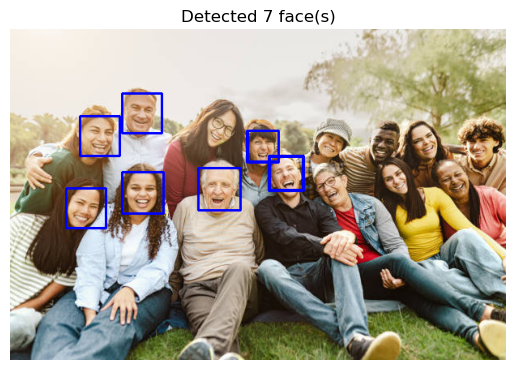

In [17]:
# Step 6: Display
plt.imshow(img_rgb)
plt.title(f"Detected {len(faces)} face(s)")
plt.axis('off')
plt.show()

Changing parameters to detect more faces

In [20]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.05,      # Make detection more sensitive
    minNeighbors=1,        # Reduce to allow more detections
    minSize=(20, 20)       # Detect smaller faces
)


In [22]:
#boxes around faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [23]:
# Step 5: Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



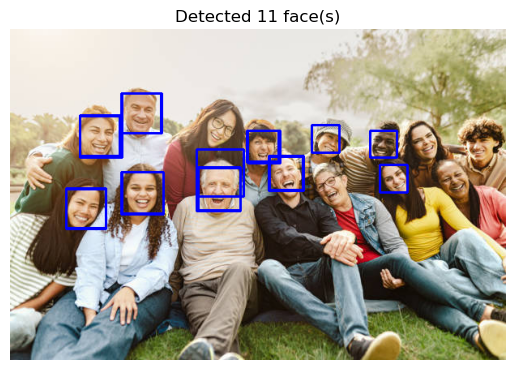

In [24]:
# Step 6: Display
plt.imshow(img_rgb)
plt.title(f"Detected {len(faces)} face(s)")
plt.axis('off')
plt.show()

Real time Webcam detection 

In [25]:
import cv2

# Load Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize webcam
cap = cv2.VideoCapture(0)  # 0 is usually the default webcam

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened. Press 'q' to quit.")

# Start the video capture loop
while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Real-Time Face Detection - Press 'q' to Quit", frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


Webcam opened. Press 'q' to quit.
